In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
# Drop CustomerID as it's not relevant for clustering
df = df.drop(columns=["CustomerID"])

# Convert categorical Gender column to numerical
# Encoding: Male=1, Female=0
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

# Selecting features for clustering (using only numerical features)
features = ["Annual Income (k$)", "Spending Score (1-100)"]
data = df[features]

In [ ]:
# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)



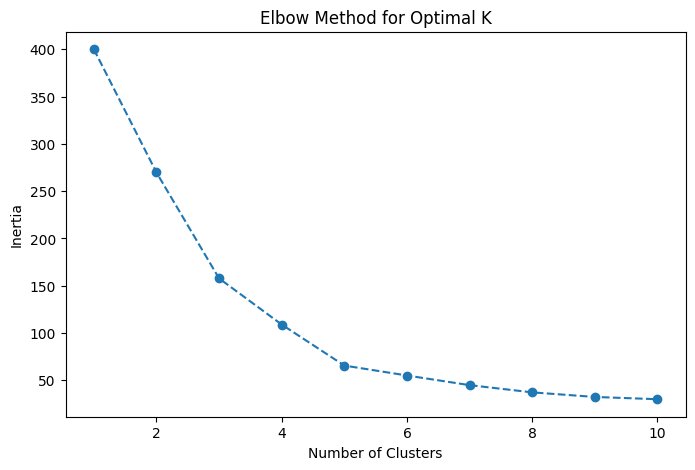

In [ ]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
# Applying K-Means with optimal K (let's assume K=5 from the elbow method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)


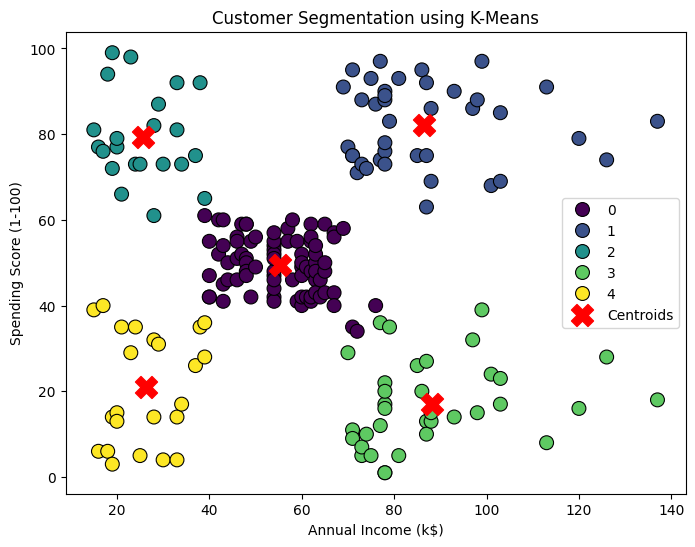

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


In [ ]:

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"],
                hue=df['Cluster'], palette='viridis', s=100, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=250, marker='X', c='red', label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

# Display clustered data
df.head()